# Predicting Road Accident Risk
**Author:** Brendan Reed  
**Date:** Nov. 4, 2025  
**Objective:** Predict survivorship using the Titanic data set

## Introduction

The Titanic dataset contains passenger information that can be used to try to predict survivors. The data includes information like ticket class, age, and sex (male/female).

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [77]:
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows

In [78]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Display just the first 10 rows
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

In [79]:
print("info: ")
titanic.info()
print(f"describe: \n{titanic.describe()}")
print(f"sum of null values: \n{titanic.isnull().sum()}")
print(f"columns: \n{titanic.columns}")

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
describe: 
         survived      pclass         age       sibsp       p

Check for correlations using the corr() method and tell it to use only the numeric features. 
   
<b>Important:</b>  The Titanic dataset contains both numeric and categorical data. Make sure to use  numeric_only=True when calculating correlations to avoid warnings.

In [80]:
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


### Reflection 1:
1) How many data instances are there? 891
2) How many features are there? 15
3) What are the names? ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
4) Are there any missing values? Yes...   
- Age: 177  
- embarked: 2  
- deck: 688  
- embark_town: 2  
5) Are there any non-numeric features? Yes...   
- sex          891 non-null    object    
- embarked     889 non-null    object  
- class        891 non-null    category
- who          891 non-null    object  
- adult_male   891 non-null    bool    
- deck         203 non-null    category
- embark_town  889 non-null    object  
- alive        891 non-null    object  
- alone        891 non-null    bool 

6) Are the data instances sorted on any of the attributes?  
Not that I have noticed.
7) What are the units of age?  
Years.
8) What are the minimum, median and max age?  
- minimum: 0.42
- median: 28
- max: 80
9) What two different features have the highest correlation?  
sibsp and alone

10) Are there any categorical features that might be useful for prediction?  
pclass - could indicate where a person was on the ship when it started sinking and could determine how likely they were to successfully evacuate.  
adult_male - women and children were prioritized first during the evacuation, so adult men had a higher likelyhood of not surviving. There is also a strong negative correlation between adult_male and survived (-0.557080).

## Section 2. Visualize Feature Distributions
### 2.1 Explore Data Patterns and Distributions

Create a scatter matrix. 


Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Important:  Use only numeric attributes for the scatter matrix. If you want to explore categorical data, use count plots and bar plots instead.

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

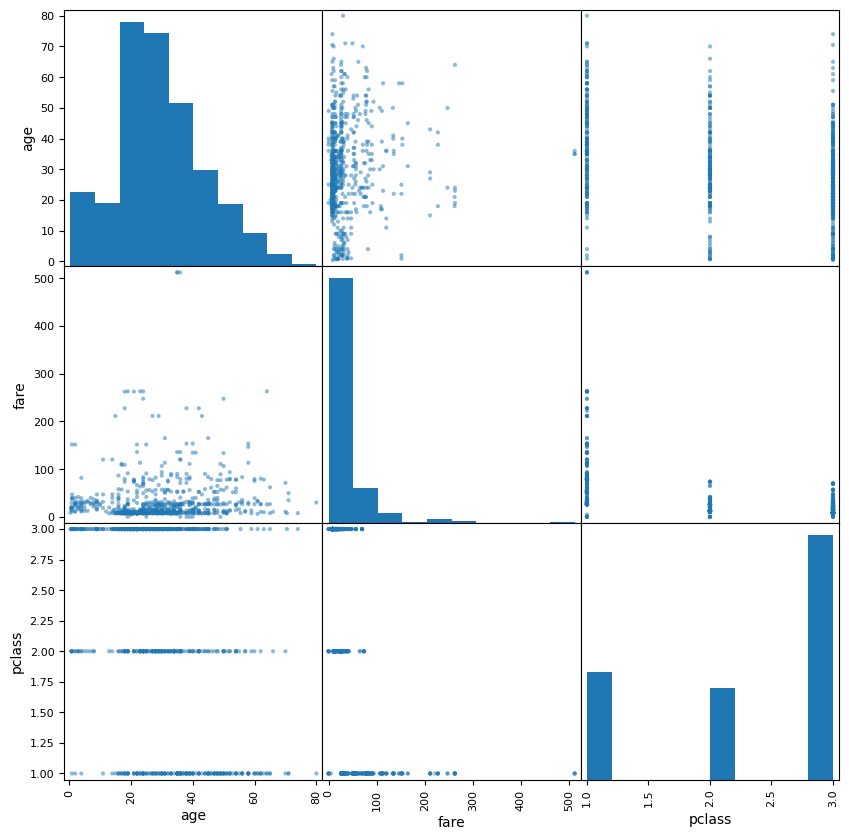

In [81]:
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

Create a scatter plot of age vs fare, colored by gender:

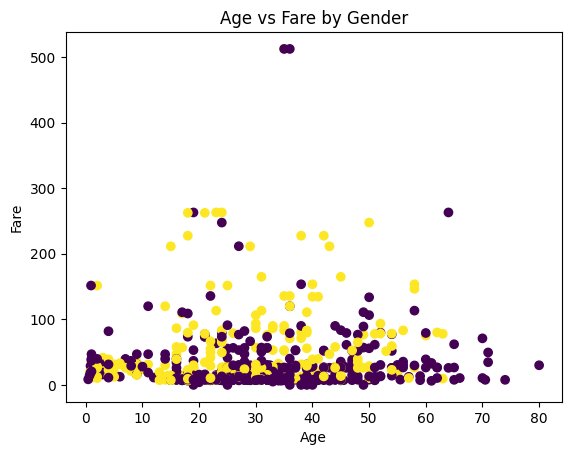

In [82]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

Create a grouped bar chart showing the relationship between sex and class.

C:\Users\reedb\AppData\Local\Temp\ipykernel_30360\1615962250.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = titanic.groupby(['class', 'sex']).size().unstack()


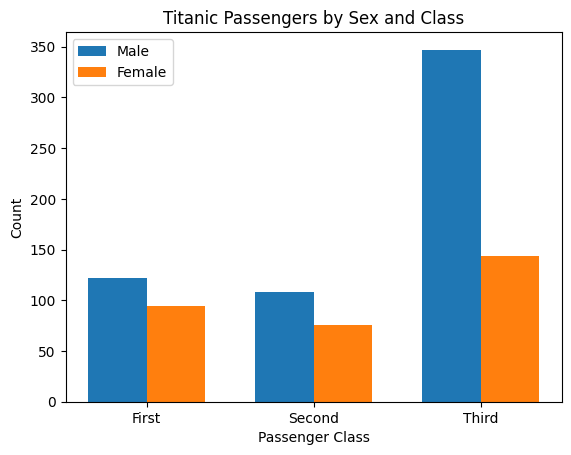

In [83]:
# Count number of passengers by sex and class
counts = titanic.groupby(['class', 'sex']).size().unstack()

# Plot grouped bars
x = range(len(counts))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], counts['male'], width=bar_width, label='Male')
plt.bar([i + bar_width/2 for i in x], counts['female'], width=bar_width, label='Female')

# Labels and formatting
plt.xticks(x, counts.index)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Titanic Passengers by Sex and Class')
plt.legend()

plt.show()


Create a histogram of age:

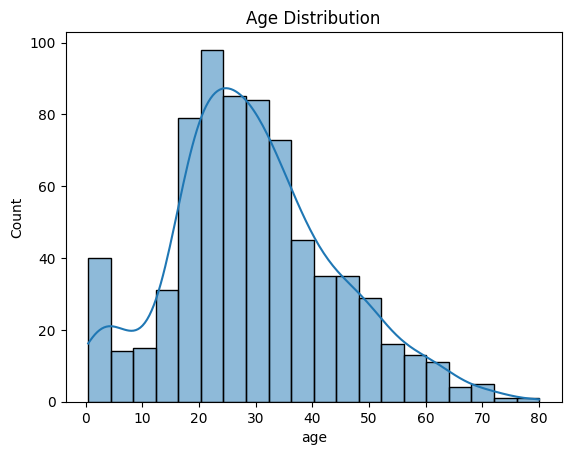

In [84]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

Create a count plot for class and survival:

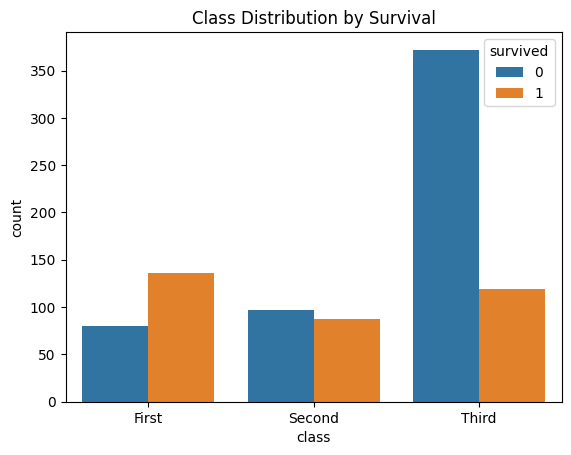

In [85]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1:
What patterns or anomalies do you notice?  
Men were far more likely to be in third class than second or first. Class is negatively correlated with survival. It could be that less men survived because they were in third class, or class is negatively corrlated with survival because less men in third class survived because they were men.  

Do any features stand out as potential predictors?  
pclass and sex  

Are there any visible class imbalances?  
Yes. Passengers in third class were much less likely to have survived.

### 2.2 Handle Missing Values and Clean Data
Age was missing values. We can impute missing values for age using the median:

In [86]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

C:\Users\reedb\AppData\Local\Temp\ipykernel_30360\3290119062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

In [87]:
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\reedb\AppData\Local\Temp\ipykernel_30360\3403561138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)


### 2.3 Feature Engineering
Create a new feature: Family size

In [88]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

Convert categorical data to numeric:

In [89]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Create a binary feature for 'alone':

In [90]:
titanic['alone'] = titanic['alone'].astype(int)

### Reflection 2.3
Why might family size be a useful feature for predicting survival?  
Perhaps families with children had a greater chance of evacuation and survival.  

Why convert categorical data to numeric?  
Features must be numeric to be used for some machine learning models.



## Section 3. Feature Selection and Justification
### 3.1 Choose features and target

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Select a target variable (as applicable)
  - Classification: Categorical target variable (e.g., gender, species).
  - Justify your selection with reasoning.

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size  
Target: survived


### 3.2 Define X and y

- Assign input features to X
- Assign target variable to y (as applicable)

In [91]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3:

Why are these features selected?  
Because they are numerical.

Are there any features that are likely to be highly predictive of survival?  
Sex, fare, and pclass all have correlations with the target variable greater than 0.25, so I believe they could be helpful in predicting survival. Sex and the target variable have a correlation > 0.5, so it is likely to be highly predictive of survival.

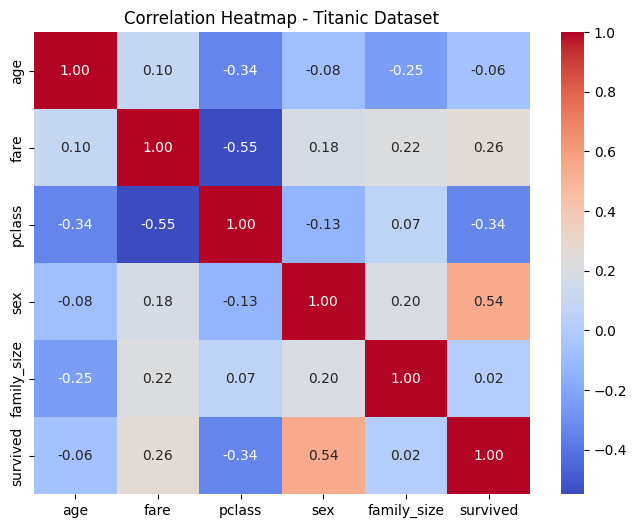

In [92]:
selected_features = pd.concat([X, y], axis=1)
corr = selected_features.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()

## Section 4. Splitting
Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. Compare.

### Basic Train/Test split 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [94]:
print(f"X_train size: {len(X_train)}")
print(f"X_test size: {len(X_test)}")
print(f"y_train size: {len(y_train)}")
print(f"y_test size: {len(y_test)}")

X_train size: 712
X_test size: 179
y_train size: 712
y_test size: 179


### Stratified Train/Test split

In [95]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [96]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4:
Why might stratification improve model performance?  
Stratification may improve model performance because it helps to maintain similar proportions of feature values after the training/test split.  

How close are the training and test distributions to the original dataset?  
Fairly close. However, I took the absolute value of the differences between the original proportions and the proportions for each type of split and found that the difference in proportions is smaller when train_test_split is used instead of stratified split.

Which split method produced better class balance?  
Interestingly, it looks like train_test_split produced a better class balance. See the below code for a comparison of different splitting methods and the original proportions.

In [97]:
selected_features = ["pclass", "sex", "family_size"]
print("train_set distribution:")
for feature in selected_features:
    train_counts = train_set[feature].value_counts(normalize=True)
    test_counts = test_set[feature].value_counts(normalize=True)
    origin_counts = titanic[feature].value_counts(normalize=True)
    reg_train_counts = X_train[feature].value_counts(normalize=True)
    reg_test_counts = X_test[feature].value_counts(normalize=True)

    df = pd.concat([origin_counts, train_counts, test_counts, 
                    reg_train_counts, reg_test_counts], axis=1)
    df.columns = ["original","strat_train", "strat_test", "regular_train", "regular_test"]
    df.dropna(inplace=True)

    strat_score = sum(abs(df["original"] - df["strat_train"]) + abs(df["original"] - df["strat_test"]))
    reg_score = sum(abs(df["original"] - df["regular_train"]) + abs(df["original"] - df["regular_test"]))
    
    print(df)
    print()
    print(feature, "split scores (less is better)")
    print("stratified split score:", strat_score)
    print("regular split score:", reg_score, "\n")

train_set distribution:
        original  strat_train  strat_test  regular_train  regular_test
pclass                                                                
3       0.551066     0.561798    0.508380       0.557584      0.525140
1       0.242424     0.227528    0.301676       0.233146      0.279330
2       0.206510     0.210674    0.189944       0.209270      0.195531

pclass split scores (less is better)
stratified split score: 0.14829577553198175
regular split score: 0.09236708304563426 

     original  strat_train  strat_test  regular_train  regular_test
sex                                                                
0    0.647587     0.646067    0.653631       0.647472      0.648045
1    0.352413     0.353933    0.346369       0.352528      0.351955

sex split scores (less is better)
stratified split score: 0.015127738371728039
regular split score: 0.001145565250141145 

             original  strat_train  strat_test  regular_train  regular_test
family_size             